### Graduate Admission Prediction

In [48]:
import pandas as pd
import numpy as numpy

In [49]:
df =pd.read_csv("Admission_Predict_Ver1.1.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [50]:
df.drop(columns=["Serial No."], inplace=True)

In [51]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [52]:
x=df.iloc[:, 0:-1]
y =df.iloc[:,-1]

In [53]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=1)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [55]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model =Sequential()
model.add(Dense(7, activation="relu", input_dim =7))
model.add(Dense(7, activation="relu", input_dim =7))
# in case of regreesion Linear is used here output is probalistic so sigmoid is used
model.add(Dense(1, activation="sigmoid"))

c:\Users\faiqi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [59]:
history =model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0864 - val_loss: 0.0947
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - val_loss: 0.0849
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0736 - val_loss: 0.0768
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0628 - val_loss: 0.0699
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0625 - val_loss: 0.0636
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0579 - val_loss: 0.0581
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0491 - val_loss: 0.0532
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - val_loss: 0.0487
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - val_loss: 0.0444
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - val_loss: 0.0401
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0344 - val_loss: 0.0361
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0

In [60]:
y_pred =model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001237361F600> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7902694820009173

In [63]:
history.history

{'loss': [0.08613540232181549,
  0.07746447622776031,
  0.07044041901826859,
  0.06405656039714813,
  0.05850899964570999,
  0.053249556571245193,
  0.048795487731695175,
  0.045046258717775345,
  0.04149269685149193,
  0.0380844846367836,
  0.03466631472110748,
  0.03163781017065048,
  0.02843952737748623,
  0.025587063282728195,
  0.023164432495832443,
  0.021039973944425583,
  0.019210834056138992,
  0.017644528299570084,
  0.016547052189707756,
  0.015599180944263935,
  0.014934437349438667,
  0.014366540126502514,
  0.01400403119623661,
  0.013680718839168549,
  0.01338453870266676,
  0.01308481115847826,
  0.012759700417518616,
  0.01237948052585125,
  0.011958752758800983,
  0.011481150984764099,
  0.011065665632486343,
  0.01069218385964632,
  0.01031603291630745,
  0.009940816089510918,
  0.009600847028195858,
  0.009285883978009224,
  0.008973811753094196,
  0.008721919730305672,
  0.008446313440799713,
  0.008210759609937668,
  0.008001282811164856,
  0.007813842967152596,
 

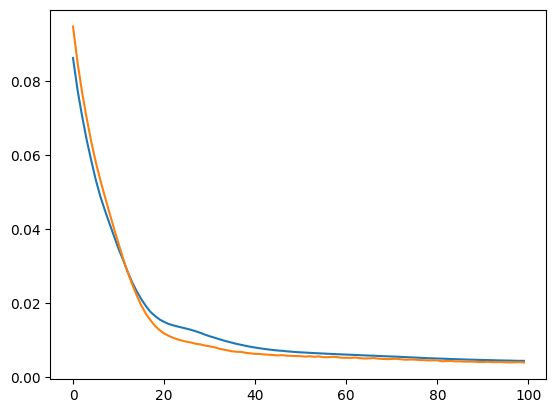

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
